In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload an image file (JPG/PNG)


Saving hc.jpg to hc.jpg


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_yolo_model(model_type="yolov5s"):
    """
    Load the YOLOv5 model.

    Args:
        model_type (str): YOLOv5 variant ('yolov5s', 'yolov5m', 'yolov5l', 'yolov5x').

    Returns:
        model: Loaded YOLOv5 model.
    """
    model = torch.hub.load('ultralytics/yolov5', model_type, pretrained=True)
    model.conf = 0.3  # Confidence threshold (adjust as needed)
    return model

def detect_objects(model, image_path):
    """
    Run object detection on an image using YOLOv5.

    Args:
        model: Preloaded YOLOv5 model.
        image_path (str): Path to the input image.

    Returns:
        results: YOLOv5 detection results.
    """
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run YOLOv5 inference
    results = model(img)

    # Show results
    results.show()
    return results



In [ ]:
# Load YOLOv5 model
model = load_yolo_model("yolov5s")  # You can change to 'yolov5m', 'yolov5l', etc.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-24 Python-3.11.11 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 113MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
img_path = list(uploaded.keys())[0]

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


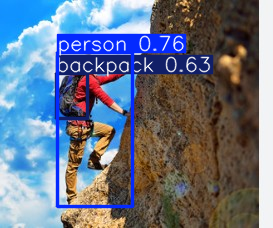

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 228x273 1 person, 1 backpack
Speed: 17.6ms pre-process, 325.2ms inference, 54.2ms NMS per image at shape (1, 3, 544, 640)

In [ ]:
detect_objects(model, img_path)
